# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

In [1]:
import os
import cv2
import pickle
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.contrib.layers import flatten
import tensorflow as tf
from sklearn.utils import shuffle

### Load training, validation and test data


In [2]:
# Load pickled data
# Fill this in based on where you saved the training and testing data

training_file = '/home/jzhang/udacity/self_drive_nd/lesson8_cnn/p2/data/train.p'
validation_file='/home/jzhang/udacity/self_drive_nd/lesson8_cnn/p2/data/valid.p'
testing_file = '/home/jzhang/udacity/self_drive_nd/lesson8_cnn/p2/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas


In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:] 

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

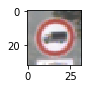

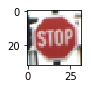

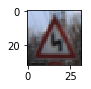

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)


### Collect histogram for training, validataion and test data


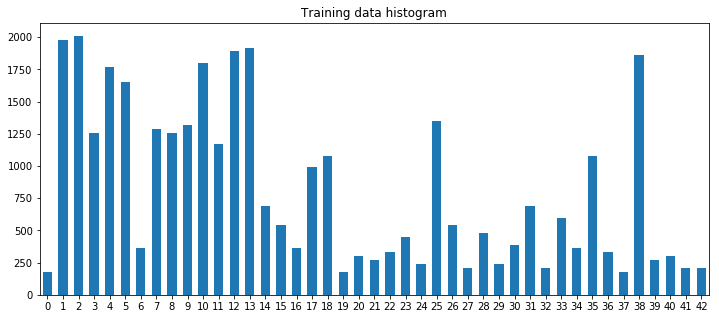

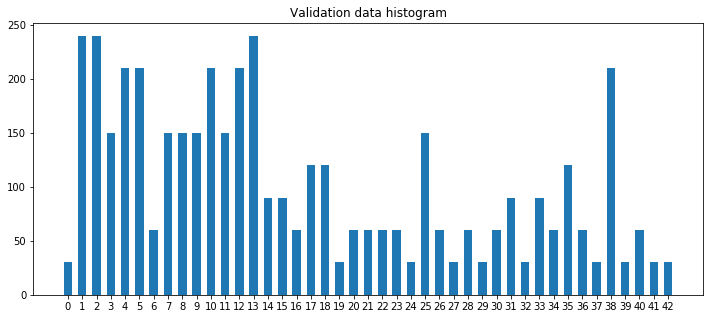

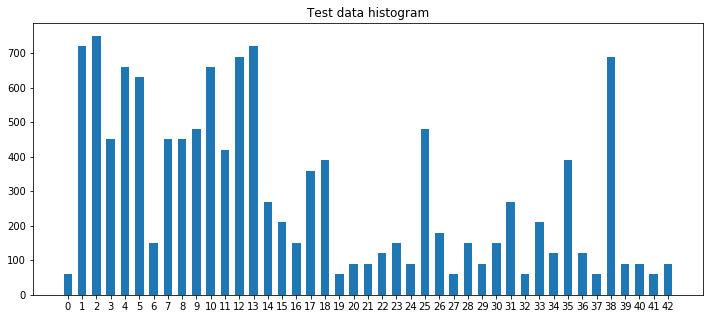

In [5]:
# historgram collection
labels_train, counts_train = np.unique(y_train, return_counts=True)
labels_valid, counts_valid = np.unique(y_valid, return_counts=True)
labels_test, counts_test = np.unique(y_test, return_counts=True)
# Plot histogram 
plt.rcParams["figure.figsize"] = [12, 5]
axes = plt.gca()
axes.set_xlim([-0.5,42.5])

plt.bar(labels_train, counts_train, tick_label=labels_train, width=0.6, align='center')
plt.title('Training data histogram')
plt.show()

plt.bar(labels_valid, counts_valid, tick_label=labels_valid, width=0.6, align='center')
plt.title('Validation data histogram')
plt.show()

plt.bar(labels_test, counts_test, tick_label=labels_test, width=0.6, align='center')
plt.title('Test data histogram')
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Preprocess Data

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

def graylize_images(X_data):
    """
    Conver the input image data from RGB to Gray8
    """
    images_gray = np.average(X_data, axis=3, weights=[0.2989, 0.5870, 0.1140])
    images_gray = np.expand_dims(images_gray, axis=3)
    return images_gray

def normalize_images(X_data):
    """
    Normalize the input image data
    """
    X_data = X_data.astype('float32')
    X_data = (X_data - 128.) / 128.
    return X_data

X_train = normalize_images(X_train)
X_test = normalize_images(X_test)
X_valid = normalize_images(X_valid)



### Model Architecture


In [7]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [8]:
### Define your architecture here.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, image_shape[2], 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x38x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. INput = 14x14x12, Output = 10x10x12.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 12), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(12))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x12. Output = 5x5x12.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x12. Output = 300.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 300. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(300, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Fully Connected. Input = 240. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        
    # Activation, with .3 chance of dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, 0.7)
    
    # Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:

accuracy = np.zeros(EPOCHS)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy[i] = validation_accuracy
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.747

EPOCH 2 ...
Validation Accuracy = 0.834

EPOCH 3 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 6 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.915

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.909

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.934

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.938

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.946

EPOCH 24 ...
Validation Accura

### Discussion on training results
In the beginning, I did not normalize, and I found that my model accuray was stuck around ~0.7. Once I normalize the images, the accuray immediately goes up to 0.94.

Also, converting images into grayscale does not help improve the my model. I am seeing accuray drops down to 0.5 for some reason.   

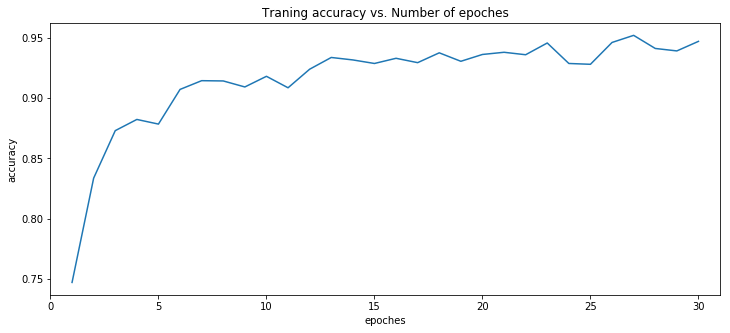

In [126]:
plt.rcParams["figure.figsize"] = [12, 5]
ax = plt.gca()
ax.set_xlim([0, EPOCHS+1])
ax.set_xlabel('epoches')
ax.set_ylabel('accuracy')

plt.title('Traning accuracy vs. Number of epoches')
x = range(1, EPOCHS + 1)
plt.plot(x, accuracy)



## Evaluate the Model

In [13]:
# Check model accuray by using test data set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images


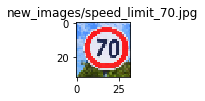

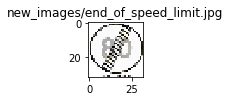

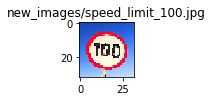

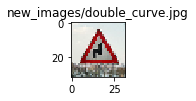

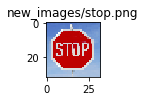

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image

imgs  = ['new_images/' + img for img in os.listdir('new_images')]
processed_imgs = []

for img in imgs:
    image = Image.open(img)
    # Covert format from whatever into RGB 
    image = image.convert('RGB')
    image = image.resize((32, 32))    
    image = np.array(list(image.getdata()), dtype='uint8')
    # Convert array from 1024x3 to 32x32x3
    image = np.reshape(image, (32, 32, 3))
    processed_imgs.append(image)

images = np.array(processed_imgs, dtype='uint8')

for i, img in enumerate(images):
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.title(imgs[i])
    


### Predict the Sign Type for Each Image

In [68]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Step 1: pre-process the image
X_images = normalize_images(images)
y_correct = [4, 6,7,21,14]
y_correct = np.array(y_correct, dtype='uint8')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_pred = sess.run(logits, feed_dict={x: X_images})

INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [87]:
with tf.Session() as sess:
    logits = tf.placeholder('float', [None, 43])
    predict_labels = tf.argmax(logits, 1)
    predict_labels = sess.run([predict_labels], feed_dict={logits: y_pred})
    

In [105]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
predict_labels[0][0]

4

The correct labels are y_correct = [4, 6,7,21,14]

In [92]:
y_correct

array([ 4,  6,  7, 21, 14], dtype=uint8)

In [107]:
#Calculate accuray 
num_diff = 0
for i in range(5):
    if y_correct[i] != predict_labels[0][i]:
        num_diff += 1
        
print("Accuray is %.3f" % ((5-num_diff)/5))



Accuray is 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [116]:
with tf.Session() as sess:
    logits = tf.placeholder('float', [None, 43])
    y_softmax = tf.nn.softmax(logits)
    top_5_prob, top_5_label = tf.nn.top_k(y_softmax, k=len(y_correct))
    top_5_probs, top_5_labels = sess.run([top_5_prob, top_5_label], feed_dict={logits: y_pred})
    

In [115]:
# Load signnames.csv to map label number to sign string
label_map = {}
with open('signnames.csv', 'r') as f:
    line0 = True
    for line in f:
        # Ignore first line
        if line0:
            line0 = False
            continue
        # Parse CSV file into a map
        label_idx, label_name = line.split(',')
        label_idx = int(label_int)
        label_map[label_idx] = label_name

In [122]:
def show_pred_results(image, top_k_val, top_k_idx):
    top_k_pred = [label_map[idx] for idx in top_k_idx]
    plt.imshow(image)
    plt.show()
    
    for i in range(5):
        print('%s: %.2f%%' % (top_k_pred[i].replace('\n', ''), top_k_val[i] * 100))

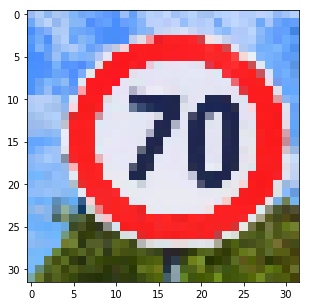

Speed limit (70km/h): 99.56%
General caution: 0.44%
Keep left: 0.00%
Go straight or left: 0.00%
Wild animals crossing: 0.00%


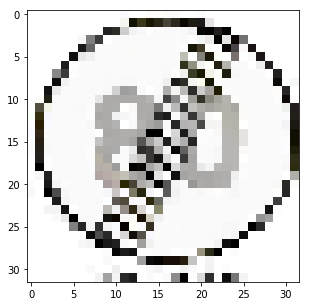

End of no passing: 56.41%
End of all speed and passing limits: 43.58%
End of speed limit (80km/h): 0.00%
Speed limit (60km/h): 0.00%
End of no passing by vehicles over 3.5 metric tons: 0.00%


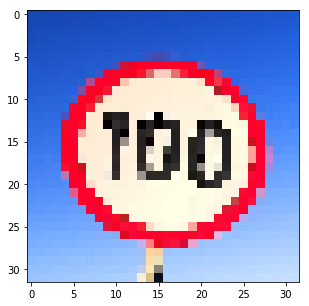

Speed limit (100km/h): 100.00%
Speed limit (120km/h): 0.00%
Speed limit (50km/h): 0.00%
Speed limit (30km/h): 0.00%
Vehicles over 3.5 metric tons prohibited: 0.00%


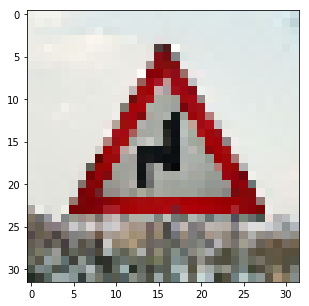

Dangerous curve to the right: 99.45%
Children crossing: 0.47%
Beware of ice/snow: 0.07%
Right-of-way at the next intersection: 0.00%
Slippery road: 0.00%


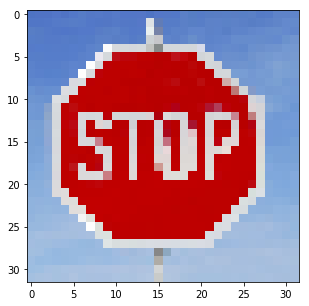

Stop: 100.00%
Bicycles crossing: 0.00%
Speed limit (30km/h): 0.00%
Priority road: 0.00%
Speed limit (80km/h): 0.00%


In [125]:
for i in range(5):
    show_pred_results(images[i], top_k_vals[i], top_k_idxs[i])
